In [1]:
# librerias

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

# para pintar
import pylab as plt
import seaborn as sns

# para que salga el grafico
%matplotlib inline

In [2]:
data = pd.read_csv('../data/attacks.csv', encoding = "ISO-8859-1")

In [3]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
data.shape

(25723, 24)

In [5]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [7]:
nan_cols = data.isna().sum() #Suma de todos los nulos por columna

nan_cols[nan_cols>0]

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [8]:
 data.describe(include='all').T #Nor puede servir para dientificar si existen duplicados

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Case Number,8702,6287,0,2400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,6302,5433,1957,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6300.0,NaN,NaN,NaN,1927.272381,281.116308,0.0,1942.0,1977.0,2005.0,2018.0
Type,6298,8,Unprovoked,4595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,6252,212,USA,2229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,5847,825,Florida,1037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5762,4108,"New Smyrna Beach, Volusia County",163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Activity,5758,1532,Surfing,971,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,6092,5230,male,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,5737,6,M,5094,NaN,NaN,NaN,NaN,NaN,NaN,NaN


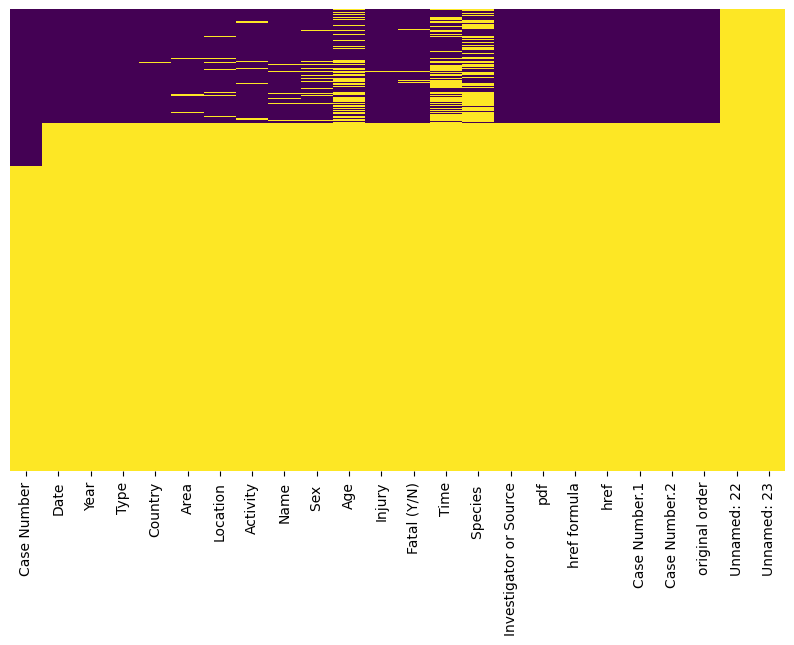

In [9]:
plt.figure(figsize=(10, 6))  

sns.heatmap(data.isna(),   
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();

In [10]:
data.isna()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
25719,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
25720,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
25721,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [11]:
null_rows = data[data.isnull().all(axis=1)] #Saca todos las filas cuyos son en su totalidad  nulos
data.isnull().all

<bound method NDFrame._add_numeric_operations.<locals>.all of        Case Number   Date   Year   Type  Country   Area  Location  Activity  \
0            False  False  False  False    False  False     False     False   
1            False  False  False  False    False  False     False     False   
2            False  False  False  False    False  False     False     False   
3            False  False  False  False    False  False     False     False   
4            False  False  False  False    False  False     False     False   
...            ...    ...    ...    ...      ...    ...       ...       ...   
25718         True   True   True   True     True   True      True      True   
25719         True   True   True   True     True   True      True      True   
25720         True   True   True   True     True   True      True      True   
25721         True   True   True   True     True   True      True      True   
25722        False   True   True   True     True   True      True    

In [12]:
data = data.dropna(how='all') #Elimino todas las filas cuyos valores sean en su totalidad nulos

In [13]:
data.shape

(8703, 24)

In [14]:
nan_cols = data.isna().sum()

nan_cols[nan_cols>0]

Case Number                  1
Date                      2401
Year                      2403
Type                      2405
Country                   2451
Area                      2856
Location                  2941
Activity                  2945
Name                      2611
Sex                       2966
Age                       5232
Injury                    2429
Fatal (Y/N)               2940
Time                      5755
Species                   5239
Investigator or Source    2418
pdf                       2401
href formula              2402
href                      2401
Case Number.1             2401
Case Number.2             2401
original order            2394
Unnamed: 22               8702
Unnamed: 23               8701
dtype: int64

In [15]:
data.duplicated().any() #Buscamos si hay algun valor duplicado

True

In [16]:
data = data.drop_duplicates() #Eliminamos las filas con valores duplicados

In [17]:
data.shape

(6311, 24)

In [18]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [19]:
data.tail(20)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6291,ND.0011,Before 1911,0.0,Unprovoked,ASIA?,NaN,NaN,Swimming,Mr. Masury,M,NaN,Foot severed,N,NaN,NaN,"Ref. J. T. Dubois in N.Y. Sun, 3/19/1911",ND-0011-Masury.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0011,ND.0011,12.0,NaN,NaN
6292,ND.0010,Circa 1862,0.0,Unprovoked,USA,Hawaii,Puna,NaN,"A ""chiefess""",F,NaN,Ankle bitten,N,NaN,NaN,Captain W. Young,ND-0010-Puna Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0010,ND.0010,11.0,NaN,NaN
6293,ND.0009,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,boy,M,NaN,"FATAL, knocked overboard by tail of shark & ca...",Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0009-boy-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0009,ND.0009,10.0,NaN,NaN
6294,ND.0008,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0008-Fisherman2-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0008,ND.0008,9.0,NaN,NaN
6295,ND.0007,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,FATAL,Y,NaN,Blue pointers,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0007 - Fisherman-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0007,ND.0007,8.0,NaN,NaN
6296,ND.0006,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,NaN,FATAL,Y,NaN,Said to involve a grey nurse shark that leapt ...,"L. Becke in New York Sun, 9/9/1906; L. Schultz...",ND-0006-ArabBoy-Prymount.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0006,ND.0006,7.0,NaN,NaN
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [20]:
nan_cols = data.isna().sum()
nan_cols[nan_cols>0]

Case Number                  1
Date                         9
Year                        11
Type                        13
Country                     59
Area                       464
Location                   549
Activity                   553
Name                       219
Sex                        574
Age                       2840
Injury                      37
Fatal (Y/N)                548
Time                      3363
Species                   2847
Investigator or Source      26
pdf                          9
href formula                10
href                         9
Case Number.1                9
Case Number.2                9
original order               2
Unnamed: 22               6310
Unnamed: 23               6309
dtype: int64

In [21]:
data.rename(columns={'Case Number': 'CaseNumber'}, inplace=True) #Cambiamos el nombre de la columna para poder utilizar itertuples que es mas eficiente que iterows
data.rename(columns={'Case Number.1': 'CaseNumber1'}, inplace=True) #Cambiamos el nombre de la columna para poder utilizar itertuples que es mas eficiente que iterows
data.rename(columns={'Case Number.2': 'CaseNumber2'}, inplace=True) #Cambiamos el nombre de la columna para poder utilizar itertuples que es mas eficiente que iterows
data.rename(columns={'href formula': 'hrefformula'}, inplace=True) #Cambiamos el nombre de la columna para poder utilizar itertuples que es mas eficiente que iterows

data['CaseNumber'] = data['CaseNumber'].astype(str)
data['CaseNumber1'] = data['CaseNumber1'].astype(str)
data['CaseNumber2'] = data['CaseNumber2'].astype(str)
data['Date'] = data['Date'].astype(str)

#data['CaseNumber2'] = data['CaseNumber2'].astype(str)
#data['Year'] = data['Year'].astype(str)
#data['CaseNumber'] = pd.to_datetime(data['CaseNumber'], format='%Y/%m/%d')

for index, row in data.iterrows(): #Quito valores null y 0 case number
    if(row.CaseNumber == "nan"): #OK quitamos nulos
        row.CaseNumber = row.CaseNumber1
    #if(row.CaseNumber == "0"): #Falta quitar 0

        
nan_cols = data.isna().sum()
nan_cols[nan_cols>0]

Year                        11
Type                        13
Country                     59
Area                       464
Location                   549
Activity                   553
Name                       219
Sex                        574
Age                       2840
Injury                      37
Fatal (Y/N)                548
Time                      3363
Species                   2847
Investigator or Source      26
pdf                          9
hrefformula                 10
href                         9
original order               2
Unnamed: 22               6310
Unnamed: 23               6309
dtype: int64

In [22]:
data['Type'] = data['Type'].astype(str)
data['Name'] = data['Name'].astype(str)

for index, row in data.iterrows(): #Quito valores null a Type
    if(row.Type == "nan"): #OK quitamos nulos
        #print("A",row.Type)
        row.Type = "unknown" 
        #print("B",row.Type)

for index, row in data.iterrows(): #Quito valores null a Type
    if(row.Name == "nan"): #OK quitamos nulos
        #print("A",row.Type)
        row.Name = "unknown" 
        #print("B",row.Type)
        
nan_cols = data.isna().sum()
nan_cols[nan_cols>0]

        

Year                        11
Country                     59
Area                       464
Location                   549
Activity                   553
Sex                        574
Age                       2840
Injury                      37
Fatal (Y/N)                548
Time                      3363
Species                   2847
Investigator or Source      26
pdf                          9
hrefformula                 10
href                         9
original order               2
Unnamed: 22               6310
Unnamed: 23               6309
dtype: int64

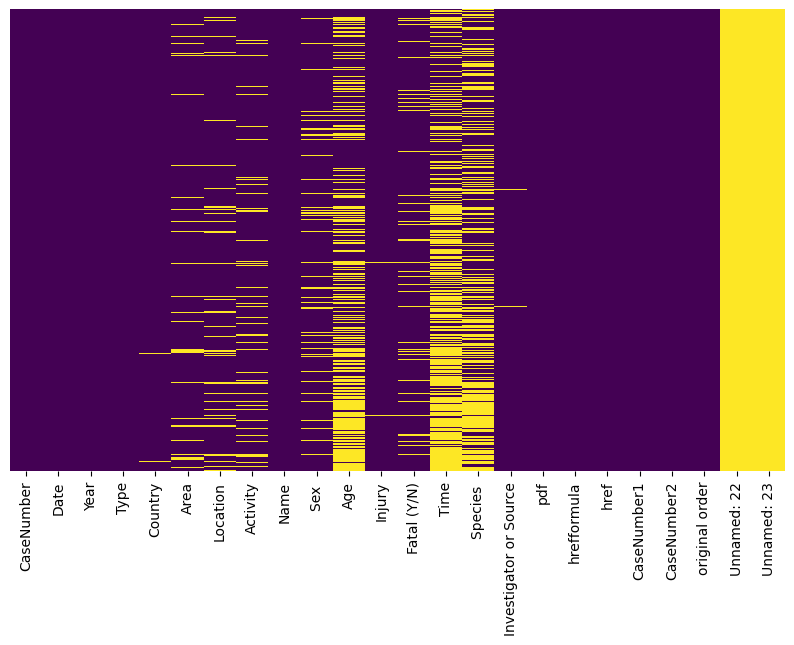

In [23]:
plt.figure(figsize=(10, 6))  

sns.heatmap(data.isna(),   
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();

In [35]:
data.info(memory_usage='deep')

data.rename(columns={'Fatal (Y/N)': 'Fatal'}, inplace=True) #Cambiamos el nombre de la columna para poder utilizar itertuples que es mas eficiente que iterows
data['Year'] = data['Year'].astype(str)

contador = 1
for indice, row in data.iterrows():
    print(row.Country)
    if(row.Date != "nan" and row.Date != "0"):
        contador = 0
    elif (row.Year != "nan" and row.Year != "0"):
        contador= 0
    elif (row.Type != "nan" and row.Type != "0"):
        contador= 0  
    elif (row.Country == "NaN"):
        print(row.Country)
        contador= 0     
    elif (row.Type.Area):
        contador= 0 
    elif (row.Type.Location):
        contador= 0 
    elif (row.Type.Activity):
        contador= 0 
    elif (row.Type.Sex):
        contador= 0 
    elif (row.Type.Age):
        contador= 0 
    elif (row.Type.Injury):
        contador= 0 
    elif (row.Type.Fatal):
        contador= 0 
    elif (row.Type.Time):
        contador= 0 
    elif (row.Type.Species):
        contador= 0 
        
    if(contador==1):
        data.drop(index=indice,inplace=True)
    else:
        contador = 1
        
data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CaseNumber              6302 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6302 non-null   object 
 3   Type                    6302 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6302 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal                   5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

AUSTRALIA
FRANCE
AUSTRALIA
USA
SOUTH AFRICA
AUSTRALIA
SOUTH KOREA
USA
SPAIN
SPAIN
SOUTH AFRICA
SOUTH AFRICA
SOUTH AFRICA
SOUTH AFRICA
SOUTH AFRICA
SOUTH AFRICA
AUSTRALIA
USA
USA
SOUTH AFRICA
USA
AUSTRALIA
USA
USA
SOUTH AFRICA
USA
USA
USA
USA
USA
SOUTH AFRICA
USA
USA
USA
USA
USA
USA
USA
USA
USA
ITALY
USA
SOUTH AFRICA
USA
AUSTRALIA
USA
USA
SOUTH AFRICA
SOUTH AFRICA
SOUTH AFRICA
NEW ZEALAND
SOUTH AFRICA
NEW CALEDONIA
SOUTH AFRICA
VANUATU
IRAN
ITALY
AUSTRALIA
USA
USA
USA
USA
USA
USA
USA
USA
USA
USA
USA
USA
USA
USA
MEXICO
USA
INDONESIA
USA
USA
SOUTH AFRICA
USA
SOUTH AFRICA
SOUTH AFRICA
USA
VANUATU
SOUTH AFRICA
SOMALIA
SOUTH AFRICA
SOUTH AFRICA
AUSTRALIA
SOUTH AFRICA
SOUTH AFRICA
SOUTH AFRICA
AUSTRALIA
SOUTH AFRICA
SOUTH AFRICA
USA
USA
GREECE
USA
AUSTRALIA
SOUTH AFRICA
SOUTH AFRICA
SOUTH AFRICA
PHILIPPINES
USA
SOUTH AFRICA
USA
USA
USA
USA
SOUTH AFRICA
USA
USA
USA
USA
AUSTRALIA
AUSTRALIA
AUSTRALIA
SOUTH AFRICA
USA
BAHAMAS
USA
USA
BAHAMAS
USA
BAHAMAS
ITALY
BAHAMAS
USA
USA
USA
USA
SOUTH AFRICA


(6302, 24)